C:\Users\vyasj\AppData\Local\Temp\ipykernel_13252\25430208.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Category', y='Number of Instances', data=job_counts, palette='viridis')


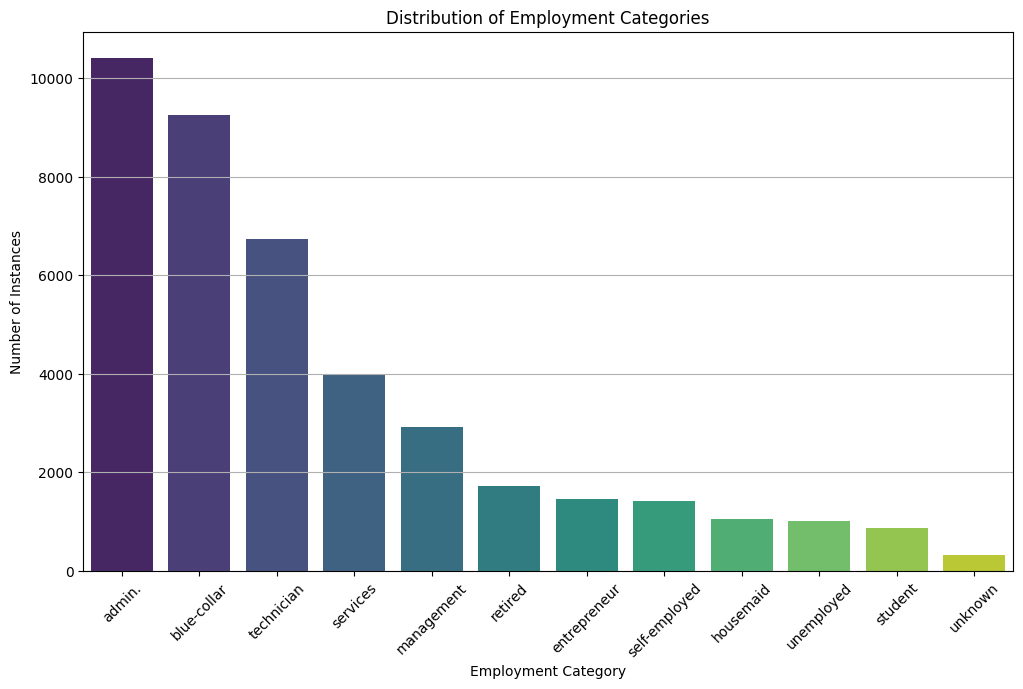

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Check if 'job' column exists and process it
if 'job' in Mydata.columns:
    # Count the occurrences of each job category
    job_counts = Mydata['job'].value_counts().reset_index()
    job_counts.columns = ['Job Category', 'Number of Instances']
    # Create a bar plot using Seaborn for a more visually appealing plot
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Job Category', y='Number of Instances', data=job_counts, palette='viridis')
    plt.xlabel('Employment Category')
    plt.ylabel('Number of Instances')
    plt.title('Distribution of Employment Categories')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


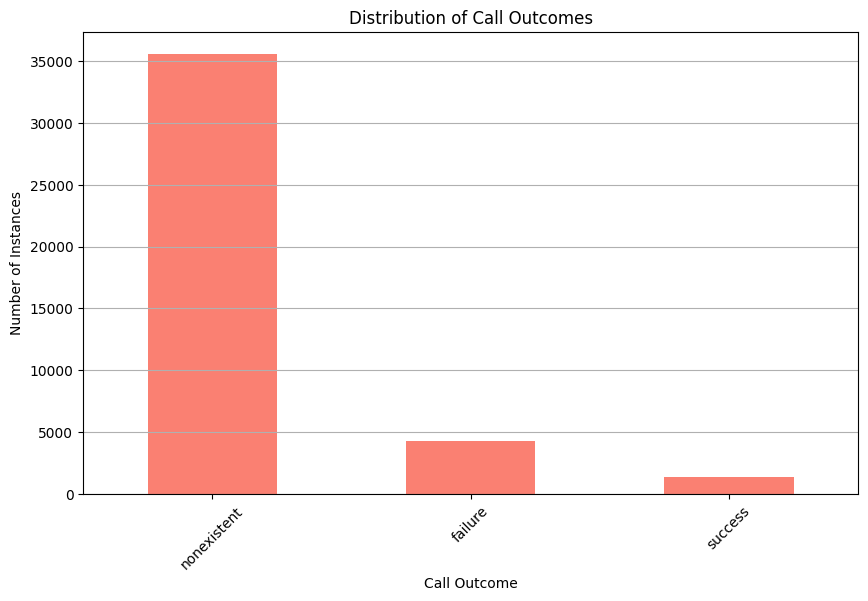

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Check if 'poutcome' column exists and process it
if 'poutcome' in Mydata.columns:
    # Count the occurrences of each call outcome
    outcome_counts = Mydata['poutcome'].value_counts()
    # Plot the distribution of call outcomes
    plt.figure(figsize=(10, 6))
    outcome_counts.plot(kind='bar', color='salmon')
    plt.xlabel('Call Outcome')
    plt.ylabel('Number of Instances')
    plt.title('Distribution of Call Outcomes')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The column 'poutcome' does not exist in the dataset.")


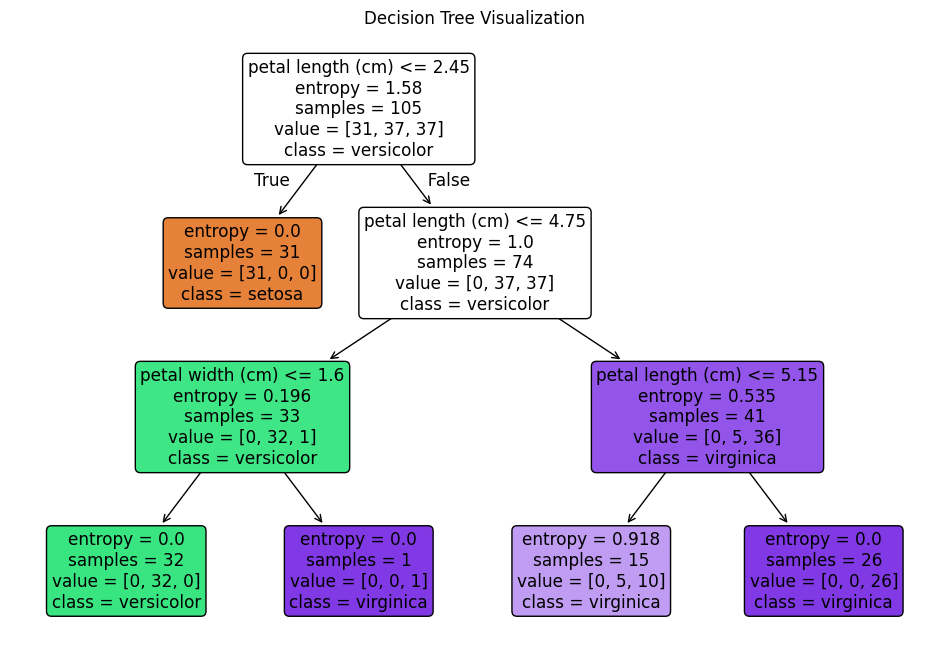

Accuracy on test set: 0.98


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
# Train the model
clf.fit(X_train, y_train)
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')


In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy on test set: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your custom dataset
data = pd.read_csv('bank-additional.csv', sep=';')  # Adjust separator if needed

# Display the first few rows and the data types to understand the structure
print(data.head())
print(data.info())

# Example preprocessing steps:
# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
# Replace 'target_column' with the actual name of the target variable
X = data.drop('y', axis=1)  # Assuming 'y' is the target column
y = data['y']  # The target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy on test set: {accuracy:.2f}')
print('Classification Report:')
print(report)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

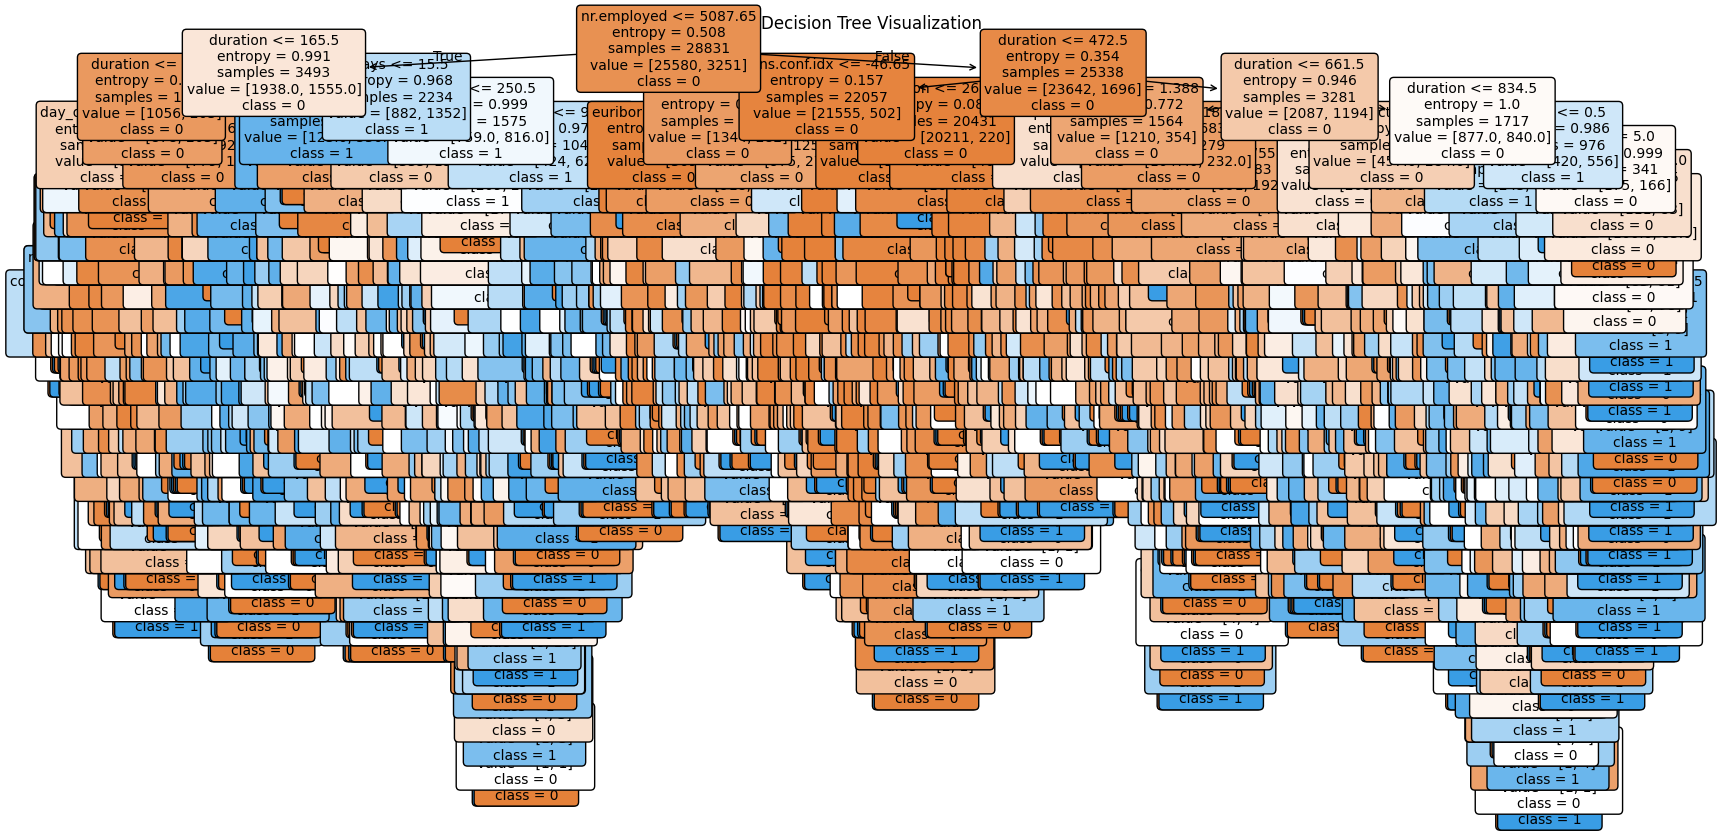

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your custom dataset
# Adjust the delimiter based on your CSV file's formatting
data = pd.read_csv('bank-additional.csv', sep=';')  # Use ';' if your file is semicolon-delimited

# Display the first few rows and the data types to understand the structure
print(data.head())
print(data.info())

# Preprocessing: Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
# Replace 'y' with the actual name of the target variable
X = data.drop('y', axis=1)  # 'y' is assumed to be the target column
y = data['y']  # 'y' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=[str(i) for i in y.unique()], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('bank-additional.csv', sep=';')  # Adjust separator if needed

# Preprocessing: Convert categorical features to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop('y', axis=1)  # 'y' is assumed to be the target column
y = data['y']  # 'y' is the target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)
# Make predictions
y_pred = rf_clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy on test set: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.50      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('bank-additional.csv', sep=';')  # Adjust separator if needed

# Preprocessing: Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop('y', axis=1)  # 'y' is assumed to be the target column
y = data['y']  # 'y' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy on test set: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy on test set: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with the actual file path if necessary)
data = pd.read_csv('bank-additional.csv', sep=';')

# Preprocessing: Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Define features and target
X = data.drop('y', axis=1)  # Features (all columns except 'y')
y = data['y']  # Target (the 'y' column)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
log_reg.fit(X_train, y_train)
# Make predictions
y_pred = log_reg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.41      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('bank-additional.csv', sep=';')

# Preprocessing: Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Define features and target
X = data.drop('y', axis=1)  # Features (all columns except 'y')
y = data['y']  # Target (the 'y' column)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train the Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
# Make predictions
y_pred = gb_clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.68      0.51      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('bank-additional.csv', sep=';')

# Preprocessing: Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop('y', axis=1)  # Features (all columns except 'y')
y = data['y']  # Target (the 'y' column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
# Create the Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier(random_state=42)
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
# Train the model
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.68      0.51      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# Define parameters
depths = [1, 3, 5, 7, 9,  11, 13, 15]
splits = [2, 5, 10,  15, 20, 25]
# Evaluate Decision Tree
print("Decision Tree Results:")
for depth in depths:
    for split in splits:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        tree.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
        predictions = tree.predict(Val.drop(columns=['y_yes']))
        accuracy = accuracy_score(Val['y_yes'], predictions)
        print(f"max_depth={depth}, min_samples_split={split} - Accuracy: {accuracy:.4f}")
# Evaluate Random Forest
n_estimators = [50, 100, 200]
print("\nRandom Forest Results:")
for depth in depths:
    for split in splits:
        for n in n_estimators:
            rf = RandomForestClassifier(max_depth=depth, min_samples_split=split, n_estimators=n, random_state=42)
            rf.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
            predictions = rf.predict(Val.drop(columns=['y_yes']))
            accuracy = accuracy_score(Val['y_yes'], predictions)
            print(f"max_depth={depth}, min_samples_split={split}, n_estimators={n} - Accuracy: {accuracy:.4f}")


Decision Tree Results:
max_depth=1, min_samples_split=2 - Accuracy: 0.8865
max_depth=1, min_samples_split=5 - Accuracy: 0.8865
max_depth=1, min_samples_split=10 - Accuracy: 0.8865
max_depth=1, min_samples_split=15 - Accuracy: 0.8865
max_depth=1, min_samples_split=20 - Accuracy: 0.8865
max_depth=1, min_samples_split=25 - Accuracy: 0.8865
max_depth=3, min_samples_split=2 - Accuracy: 0.8971
max_depth=3, min_samples_split=5 - Accuracy: 0.8971
max_depth=3, min_samples_split=10 - Accuracy: 0.8971
max_depth=3, min_samples_split=15 - Accuracy: 0.8971
max_depth=3, min_samples_split=20 - Accuracy: 0.8971
max_depth=3, min_samples_split=25 - Accuracy: 0.8971
max_depth=5, min_samples_split=2 - Accuracy: 0.8962
max_depth=5, min_samples_split=5 - Accuracy: 0.8962
max_depth=5, min_samples_split=10 - Accuracy: 0.8962
max_depth=5, min_samples_split=15 - Accuracy: 0.8962
max_depth=5, min_samples_split=20 - Accuracy: 0.8962
max_depth=5, min_samples_split=25 - Accuracy: 0.8960
max_depth=7, min_samples_spli

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
data = pd.read_csv("bank-additional.csv", sep=';')

# 2. Remove the 'duration' column
data = data.drop(columns=['duration'])

# 3. Preprocessing: Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# 4. Define features and target
X = data.drop('y', axis=1)  # Features (all columns except 'y')
y = data['y']  # Target (the 'y' column)
# 5. Create RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# 6. Apply k-fold cross-validation (using 5-fold cross-validation)
cv_scores = cross_val_score(rf, X, y, cv=5)
# 7. Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation scores: [0.8873513  0.32422918 0.40470988 0.12188904 0.14398446]
Mean accuracy: 0.3764
Standard deviation: 0.2769


Columns in the DataFrame: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'cluster'],
      dtype='object')


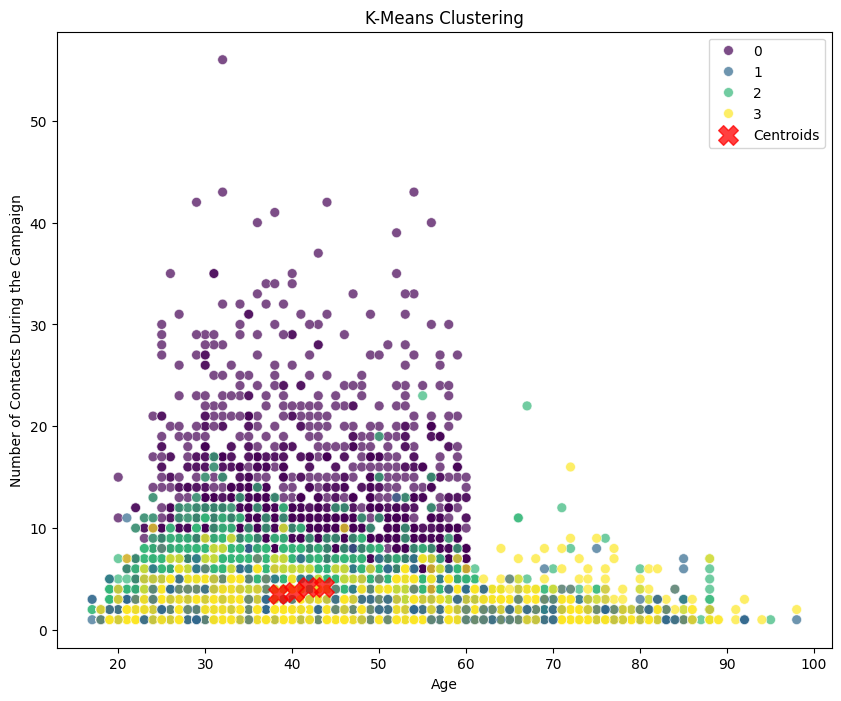

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Preprocess Data
data = pd.read_csv('bank-additional.csv', sep=';')

# Drop non-numeric column 'duration' which might cause data leakage
data = data.drop(columns=['duration'])
# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Define features (excluding target column 'y')
X = data.drop('y', axis=1)
# 2. Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Set number of clusters
data['cluster'] = kmeans.fit_predict(X)  # Fit model and assign cluster labels
# 3. Visualize Results
# Verify available columns
print("Columns in the DataFrame:", data.columns)
# Plot the clusters using columns 'age' and 'campaign' as an example
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['age'], y=data['campaign'], hue=data['cluster'], palette='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Number of Contacts During the Campaign')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


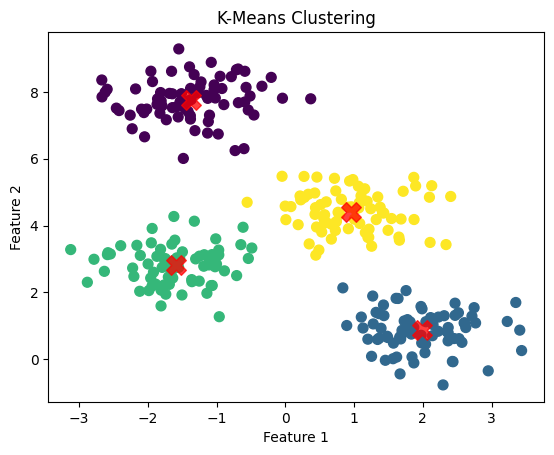

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 1. Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# 2. Create KMeans model
kmeans = KMeans(n_clusters=4)
# 3. Fit model to data
kmeans.fit(X)
# 4. Get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
# 5. Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)
# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)
# 5. Define input features and target variable
X_train = Train.drop(columns=['y_yes'])
y_train = Train['y_yes']
X_val = Val.drop(columns=['y_yes'])
y_val = Val['y_yes']
# 6. Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
# 7. Make predictions
predictions = xgb_model.predict(X_val)
# 8. Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"XGBoost Accuracy: {accuracy:.4f}")


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8973


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)
# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)
# 5. Define input features and target variable
X_train = Train.drop(columns=['y_yes'])
y_train = Train['y_yes']
X_val = Val.drop(columns=['y_yes'])
y_val = Val['y_yes']
# 6. Create an AdaBoost model with a decision tree as the base learner
base_model = DecisionTreeClassifier(max_depth=1)  # A simple decision tree
ada_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
# 7. Train the AdaBoost model
ada_model.fit(X_train, y_train)
# 8. Make predictions
predictions = ada_model.predict(X_val)
# 9. Evaluate the model
accuracy = accuracy_score(y_val, predictions)
print(f"AdaBoost Accuracy: {accuracy:.4f}")


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8969
